In [1]:
import importlib
import reservoirpy.nodes as nodes
import reservoirpy as rpy
from reservoirpy.datasets import mackey_glass
import custom_node
import numpy as np
import matplotlib.pyplot as plt
importlib.reload(custom_node)
rpy.set_seed(42)  
%matplotlib inline

In [2]:
X = mackey_glass(2000, tau=17)

# Normalizing Series in the range of [-1,1]
X_min, X_max = X.min(), X.max()
X_norm_01 = (X - X_min) / (X_max - X_min)
X_norm_final = 2 * X_norm_01 - 1

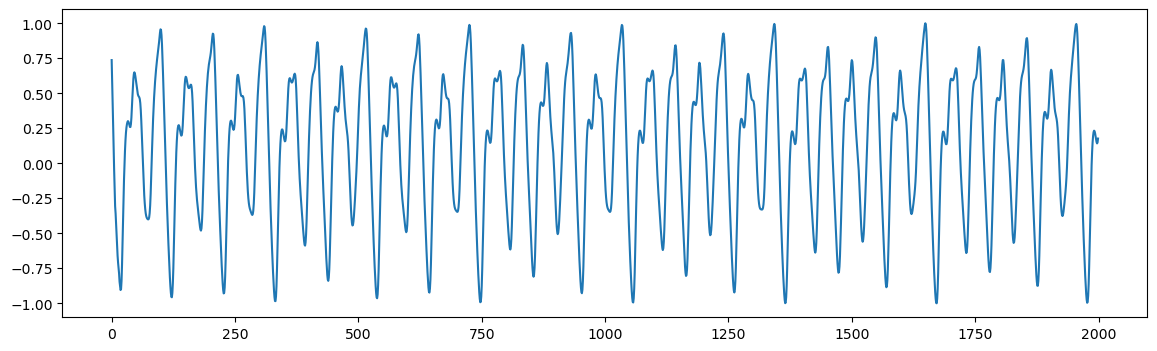

In [3]:
plt.figure(figsize=(14,4))
plt.plot(X_norm_final)
plt.show()

In [29]:
X_train = X_norm_final[:1500]
Y_train = X_norm_final[1:1501]

# Standard TanH ESN

In [30]:
reservoir = custom_node.StandardTanhNeuron(50, lr=0.1, seed=42)
readout = nodes.Ridge(ridge=1e-4)

esn_model = reservoir >> readout

In [31]:
esn_model = esn_model.fit(X_train, Y_train, warmup=50)

In [32]:
Y_pred_5 = np.empty((5, 1))
x = Y_train[-1].copy().reshape(1,1)
STATE_pred_5 = np.empty((5, 50))
for i in range(5):
    # print(x)
    current_state = reservoir.run(x)
    STATE_pred_5[i, :] = current_state
    
    Y_pred_5[i] = readout(current_state.squeeze())
    x = Y_pred_5[i].reshape(1,1)

In [33]:
np.sqrt(np.sum((X_norm_final[1500:1505]-Y_pred_5.T)**2)/5)

np.float64(0.19884515292620197)

## Plots

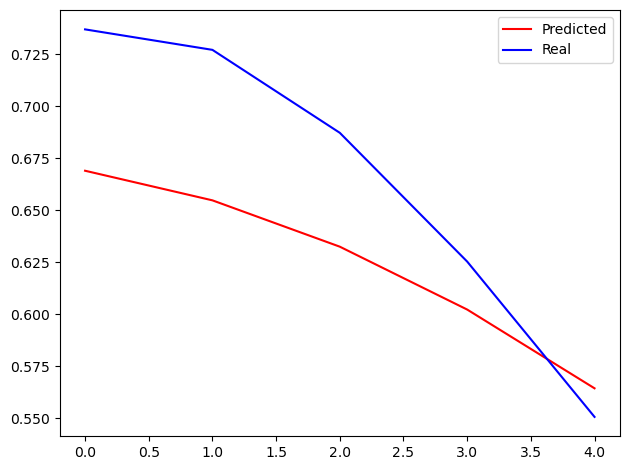

In [34]:
plt.plot(Y_pred_5, label = "Predicted", color="red")
plt.plot(X_norm_final[1500:1505], label = "Real", color="blue")

plt.legend()
plt.tight_layout()
plt.show()

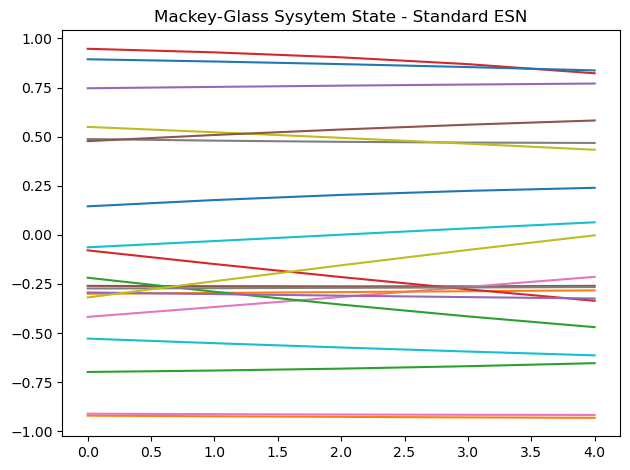

In [35]:
plt.plot(STATE_pred_5[:, :20])
plt.title(f"Mackey-Glass Sysytem State - Standard ESN")


# plt.legend()
plt.tight_layout()
plt.show()

# ELM Neuron

In [36]:
elm = custom_node.ELMNeuron(50, fast_decay=0.5, slow_decay=0.3, seed=42)
elm_readout = nodes.Ridge(ridge=1e-4)
elm_model = elm >> elm_readout

In [37]:
trained_elm = elm_model.fit(
    X_train, Y_train
)

In [38]:
Y_pred_5_elm = np.empty((5, 1))
x = Y_train[-1].copy().reshape(1,1)
STATE_pred_5_elm = np.empty((5, 50))
for i in range(5):
    # print(x)
    output = elm_model.run(x)
    STATE_pred_5_elm[i, :] = elm.state["out"]
    

    Y_pred_5_elm[i] = output.squeeze()
    x = Y_pred_5_elm[i].reshape(1,1)

In [39]:
np.sqrt(np.sum((X_norm_final[1500:1505]-Y_pred_5_elm.T)**2)/5)

np.float64(0.1966263482002686)

## Plots

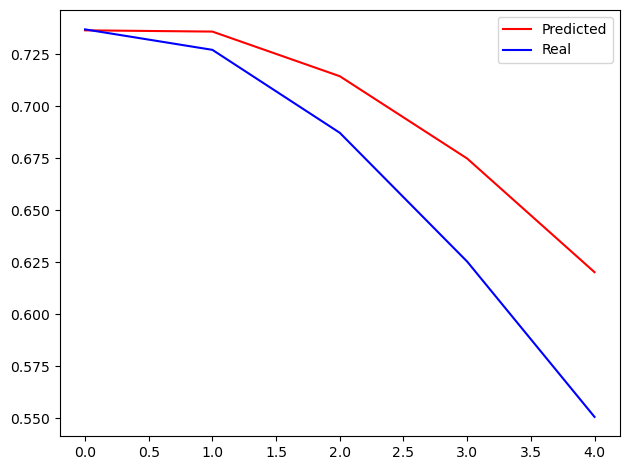

In [40]:
plt.plot(Y_pred_5_elm, label = "Predicted", color="red")
plt.plot(X_norm_final[1500:1505], label = "Real", color="blue")

plt.legend()
plt.tight_layout()
plt.show()

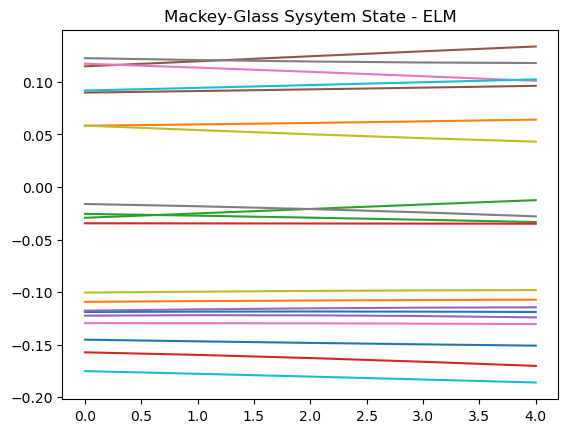

In [41]:
plt.plot(STATE_pred_5_elm[:,:20])
plt.title(f"Mackey-Glass Sysytem State - ELM")
plt.show()

# Calcitron Neuron

In [42]:
calcitron = custom_node.CalcitronNeuron(3) # size SHOULD be equal to the dimnesion of the input

calcitron_readout = nodes.Ridge(ridge=1e-4)

calcitron_model = calcitron >> calcitron_readout

In [43]:
trained_calcitron = calcitron_model.fit(
    X_train, 
    Y_train
)

In [44]:
Y_pred_5 = np.empty((5, 1))
x = Y_train[-1].copy().reshape(1,1)
STATE_pred_5_calcitron = np.empty((5, 3))
for i in range(5):
    # print(x)
    output = calcitron_model.run(x)
    STATE_pred_5_calcitron[i, :] = calcitron.state["out"]
    

    Y_pred_5[i] = output.squeeze()
    x = Y_pred_5[i].reshape(1,1)

In [45]:
np.sqrt(np.sum((X_norm_final[1500:1505]-Y_pred_5.T)**2)/5)

np.float64(0.3350348470675006)

## Plots

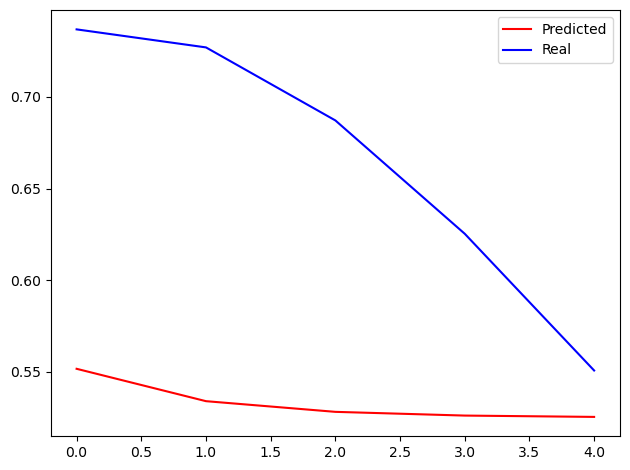

In [46]:
plt.plot(Y_pred_5, label = "Predicted", color="red")
plt.plot(X_norm_final[1500:1505], label = "Real", color="blue")

plt.legend()
plt.tight_layout()
plt.show()

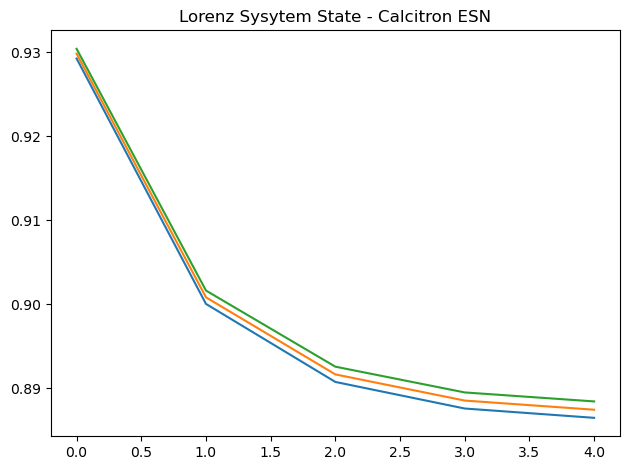

In [47]:
plt.plot(STATE_pred_5_calcitron)
plt.title(f"Lorenz Sysytem State - Calcitron ESN")

plt.tight_layout()
plt.show()